<a href="https://colab.research.google.com/github/meghana-anupoju/AI-Resume-Screening-System/blob/main/AI_Job_Salary_Predictor_using_Random_Forest_%26_Streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/ai_job_dataset.csv")

In [ ]:
data.head(10)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
5,AI00006,AI Architect,123574,EUR,SE,CT,Germany,M,Germany,50,"Data Visualization, R, SQL, Linux",Associate,7,Healthcare,2024-08-31,2024-10-04,819,5.9,Neural Networks Co
6,AI00007,Principal Data Scientist,79670,GBP,MI,FL,United Kingdom,S,United Kingdom,0,"R, Docker, MLOps",Associate,3,Gaming,2024-12-29,2025-02-28,1936,6.3,DataVision Ltd
7,AI00008,NLP Engineer,70640,EUR,EN,FL,France,L,France,0,"Python, SQL, Computer Vision, Java, Azure",Master,0,Healthcare,2024-06-07,2024-07-01,1286,7.6,Cloud AI Solutions
8,AI00009,Data Analyst,160710,USD,SE,CT,Singapore,L,Singapore,0,"Hadoop, Git, Mathematics, Python",PhD,7,Government,2024-11-04,2024-11-24,551,9.3,Quantum Computing Inc
9,AI00010,AI Software Engineer,102557,USD,SE,PT,Austria,M,Austria,0,"MLOps, GCP, Scala, Azure, Linux",Master,5,Government,2024-10-20,2024-11-06,2340,5.8,Cloud AI Solutions


In [ ]:
data.tail(5)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics
14999,AI15000,Computer Vision Engineer,56481,USD,MI,PT,Austria,S,Austria,50,"Scala, Azure, Deep Learning, GCP, Mathematics",PhD,2,Technology,2024-07-18,2024-08-10,2492,7.6,AI Innovations


In [ ]:
data.shape

(15000, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [ ]:
data.isnull().sum()

,0
job_id,0
job_title,0
salary_usd,0
salary_currency,0
experience_level,0
employment_type,0
company_location,0
company_size,0
employee_residence,0
remote_ratio,0


In [ ]:
data.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [ ]:
print(data['job_title'].value_counts())

job_title
Machine Learning Researcher    808
AI Software Engineer           784
Autonomous Systems Engineer    777
Machine Learning Engineer      772
AI Architect                   771
Head of AI                     765
NLP Engineer                   762
Robotics Engineer              759
Data Analyst                   759
AI Research Scientist          756
Data Engineer                  749
AI Product Manager             743
Research Scientist             742
Principal Data Scientist       734
AI Specialist                  728
ML Ops Engineer                725
Computer Vision Engineer       724
Data Scientist                 720
Deep Learning Engineer         718
AI Consultant                  704
Name: count, dtype: int64


In [ ]:
print(data['experience_level'].value_counts())

experience_level
MI    3781
EX    3760
SE    3741
EN    3718
Name: count, dtype: int64


In [ ]:
print(data['employment_type'].value_counts())

employment_type
FT    3812
FL    3758
CT    3721
PT    3709
Name: count, dtype: int64


In [ ]:
print(data['company_location'].value_counts())

company_location
Germany           814
Denmark           778
Canada            769
France            769
Austria           765
Singapore         764
China             763
India             754
Sweden            752
Israel            751
Ireland           750
Switzerland       746
Japan             733
Finland           733
Australia         732
Netherlands       731
United Kingdom    729
United States     724
South Korea       722
Norway            721
Name: count, dtype: int64


In [ ]:

print(data['company_size'].value_counts())

company_size
S    5007
L    4998
M    4995
Name: count, dtype: int64


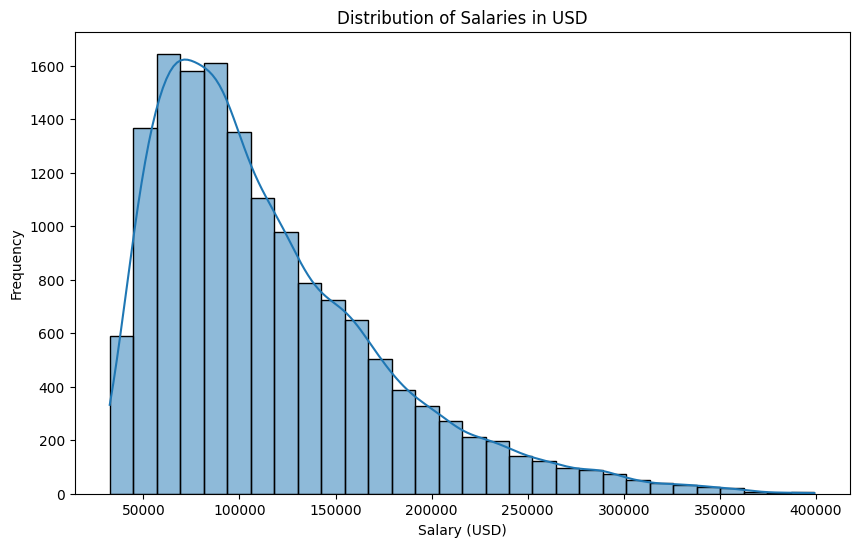

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_usd'], bins=30, kde=True)
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

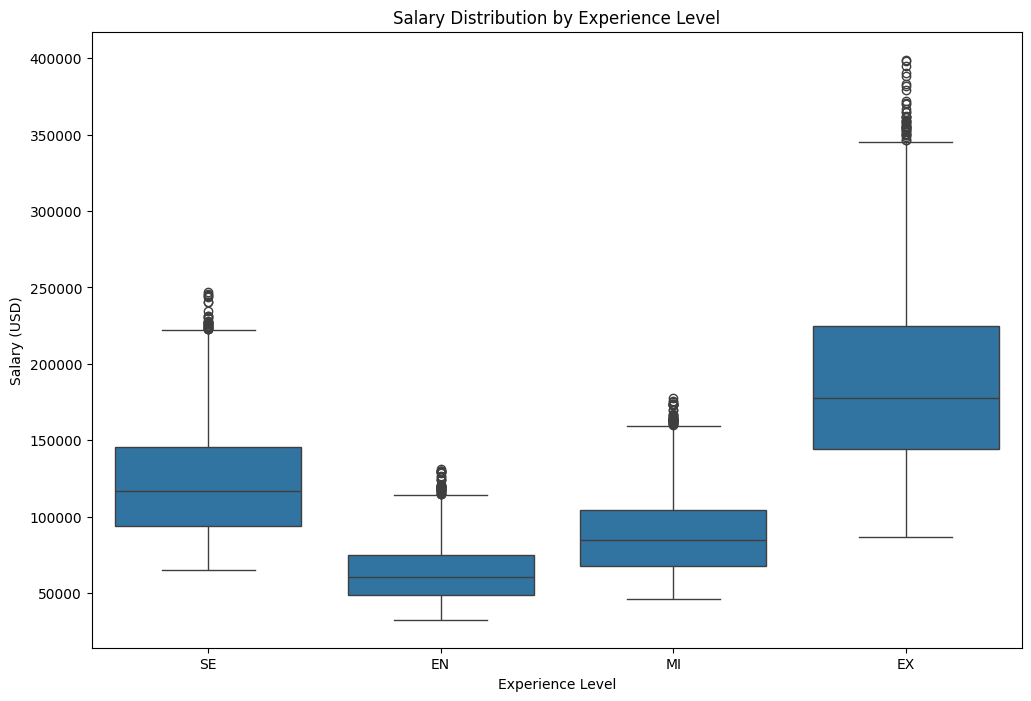

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='experience_level', y='salary_usd', data=data)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

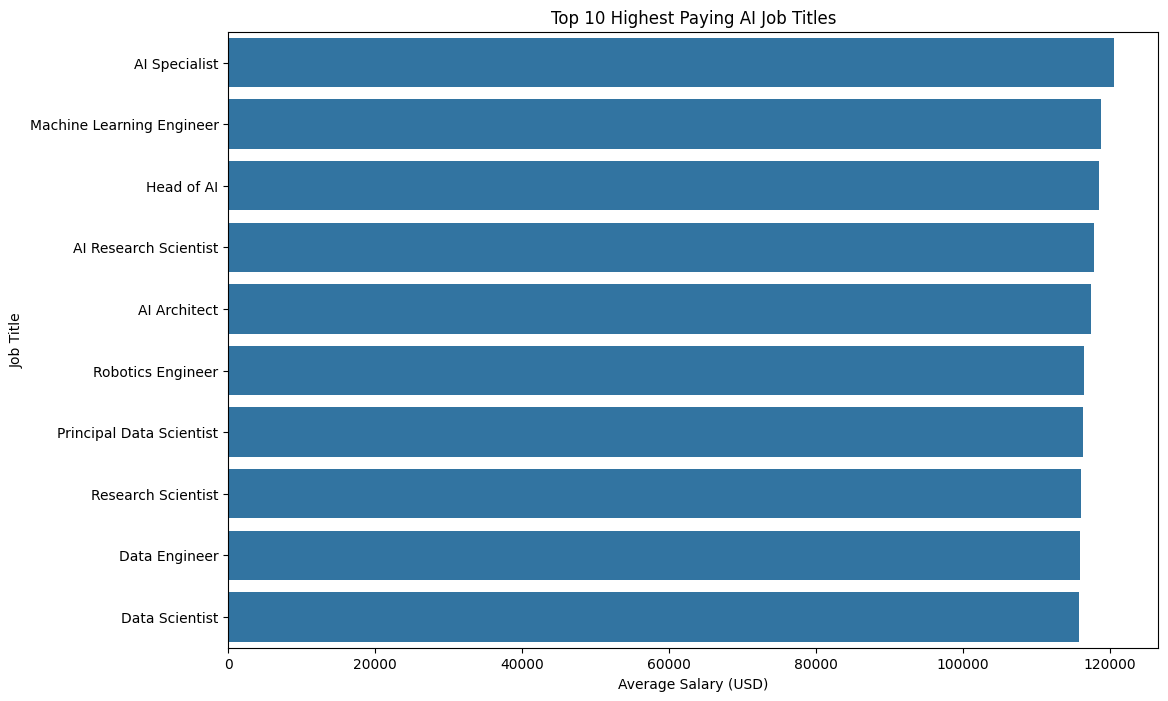

In [ ]:
top_10_jobs = data.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_jobs.values, y=top_10_jobs.index)
plt.title('Top 10 Highest Paying AI Job Titles')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.show()

In [ ]:
# Select categorical columns for one-hot encoding
categorical_cols = ['job_title', 'experience_level', 'employment_type', 'company_location', 'company_size']

# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the first 5 rows of the new encoded data
data_encoded.head()

,job_id,salary_usd,salary_currency,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,...,company_location_Netherlands,company_location_Norway,company_location_Singapore,company_location_South Korea,company_location_Sweden,company_location_Switzerland,company_location_United Kingdom,company_location_United States,company_size_M,company_size_S
0,AI00001,90376,USD,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,...,False,False,False,False,False,False,False,False,True,False
1,AI00002,61895,USD,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,...,False,False,False,False,False,False,False,False,True,False
2,AI00003,152626,USD,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,...,False,False,False,False,False,True,False,False,False,False
3,AI00004,80215,USD,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,...,False,False,False,False,False,False,False,False,True,False
4,AI00005,54624,EUR,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Define features (X) and target (y)
X = data_encoded.drop(['salary_usd', 'job_id', 'salary_currency', 'employee_residence', 'required_skills', 'education_required', 'industry', 'posting_date', 'application_deadline', 'company_name'], axis=1)
y = data_encoded['salary_usd']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Mean Squared Error (MSE): ${mse:,.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): $15,661.71
Mean Squared Error (MSE): $497,698,854.13
R-squared (R²): 0.86


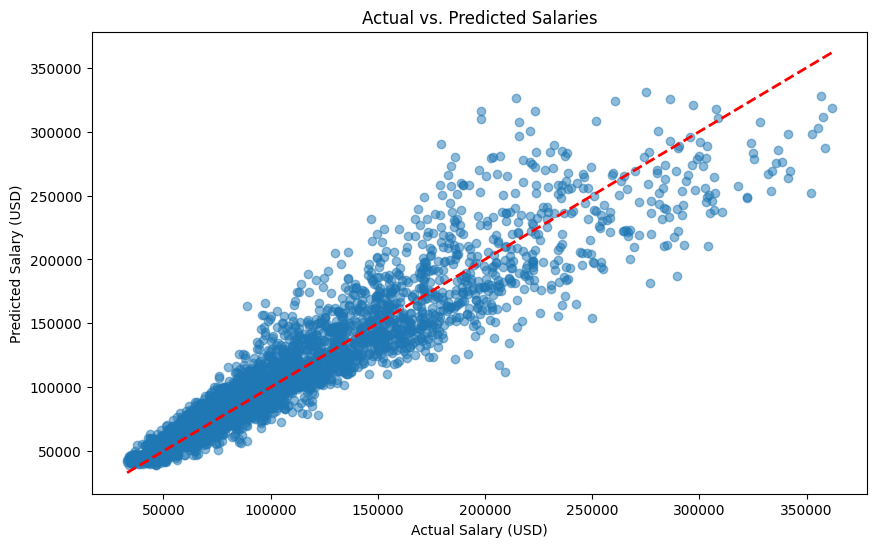

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs. Predicted Salaries')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.show()

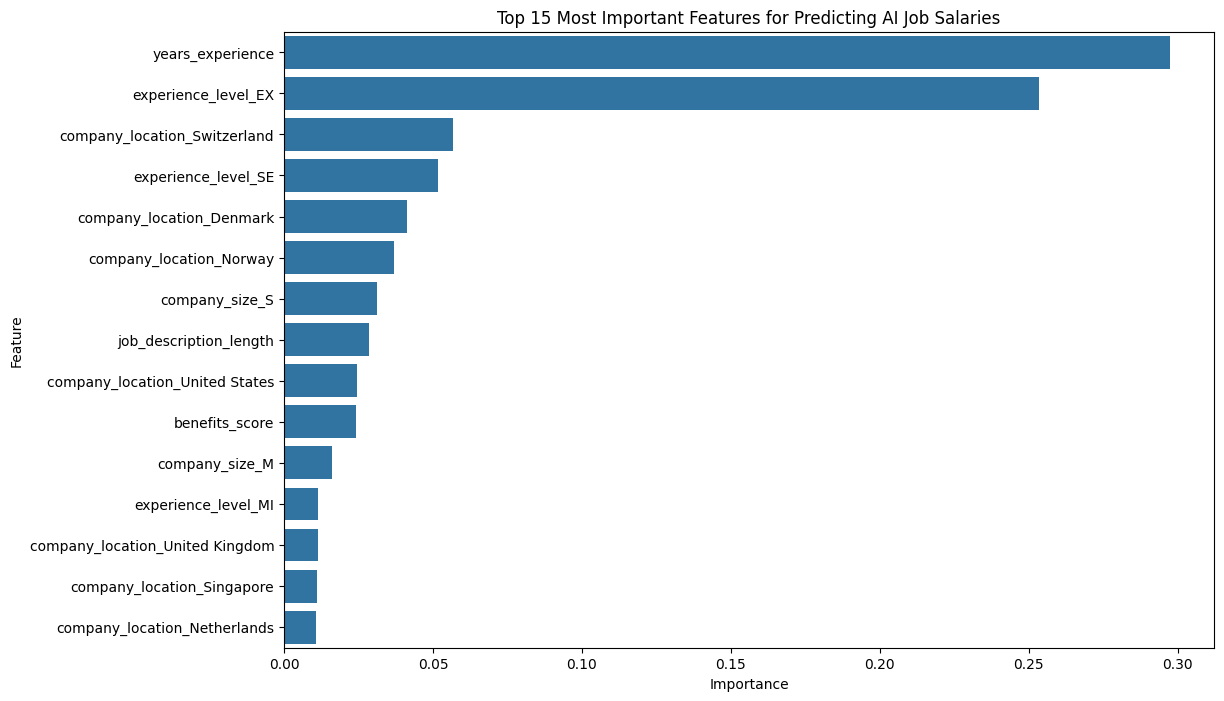

In [ ]:
# Get feature importances from the trained model
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort features by importance and select the top 15
top_15_features = feature_importance_df.sort_values(by='importance', ascending=False).head(15)

# Plot the top 15 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=top_15_features)
plt.title('Top 15 Most Important Features for Predicting AI Job Salaries')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics for the Gradient Boosting model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Model Performance:")
print(f"Mean Absolute Error (MAE): ${mae_gb:,.2f}")
print(f"Mean Squared Error (MSE): ${mse_gb:,.2f}")
print(f"R-squared (R²): {r2_gb:.2f}")

print("\nRandom Forest Model Performance (for comparison):")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Mean Squared Error (MSE): ${mse:,.2f}")
print(f"R-squared (R²): {r2:.2f}")

Gradient Boosting Model Performance:
Mean Absolute Error (MAE): $15,119.49
Mean Squared Error (MSE): $445,666,243.98
R-squared (R²): 0.88

Random Forest Model Performance (for comparison):
Mean Absolute Error (MAE): $15,661.71
Mean Squared Error (MSE): $497,698,854.13
R-squared (R²): 0.86


In [ ]:
import joblib

# Define the filename for the saved model
model_filename = 'ai_salary_predictor_rf_model.joblib'

# Save the trained Random Forest model to a file
joblib.dump(rf_model, model_filename)

print(f"Model saved successfully as '{model_filename}'")

# You can load the model back later like this:
# loaded_model = joblib.load(model_filename)
# print("Model loaded successfully.")

Model saved successfully as 'ai_salary_predictor_rf_model.joblib'


In [ ]:
import pandas as pd
import joblib

# Load the saved model
model_filename = 'ai_salary_predictor_rf_model.joblib'
loaded_model = joblib.load(model_filename)
print(f"Model '{model_filename}' loaded successfully.")

# Load the training data columns for reference
# In a real application, you would save these columns along with the model
# Get the actual column names from the X_train DataFrame used for training
X_train_columns = X_train.columns


# Create a new hypothetical job profile
new_job_profile = {
    'work_year': 2024,
    'experience_level': 'Senior',
    'employment_type': 'FT',
    'job_title': 'Data Scientist',
    'company_location': 'US',
    'remote_ratio': 100,
    'company_size': 'M'
}

# Convert the new profile into a pandas DataFrame
new_data = pd.DataFrame([new_job_profile])

print("\nNew Job Profile to Predict:")
display(new_data)

Model 'ai_salary_predictor_rf_model.joblib' loaded successfully.

New Job Profile to Predict:


,work_year,experience_level,employment_type,job_title,company_location,remote_ratio,company_size
0,2024,Senior,FT,Data Scientist,US,100,M


In [ ]:
# Apply one-hot encoding
new_data_encoded = pd.get_dummies(new_data)

# Align the columns of the new data with the training data
# This adds missing columns and fills them with 0, and ensures the order is the same
new_data_aligned = new_data_encoded.reindex(columns=X_train_columns, fill_value=0)


# Use the loaded model to make a prediction
predicted_salary = loaded_model.predict(new_data_aligned)

print(f"\nPredicted Salary (USD): ${predicted_salary[0]:,.2f} 💵")


Predicted Salary (USD): $51,889.79 💵


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [ ]:
# Get the exact column list from the training data
X_train_columns = X_train.columns.tolist()

# Print the list so you can copy it
print(X_train_columns)

# We can also save this list to a file for better practice
import joblib
joblib.dump(X_train_columns, 'model_columns.joblib')

print("\nSaved the column list to 'model_columns.joblib' for future use.")

['remote_ratio', 'years_experience', 'job_description_length', 'benefits_score', 'job_title_AI Consultant', 'job_title_AI Product Manager', 'job_title_AI Research Scientist', 'job_title_AI Software Engineer', 'job_title_AI Specialist', 'job_title_Autonomous Systems Engineer', 'job_title_Computer Vision Engineer', 'job_title_Data Analyst', 'job_title_Data Engineer', 'job_title_Data Scientist', 'job_title_Deep Learning Engineer', 'job_title_Head of AI', 'job_title_ML Ops Engineer', 'job_title_Machine Learning Engineer', 'job_title_Machine Learning Researcher', 'job_title_NLP Engineer', 'job_title_Principal Data Scientist', 'job_title_Research Scientist', 'job_title_Robotics Engineer', 'experience_level_EX', 'experience_level_MI', 'experience_level_SE', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT', 'company_location_Austria', 'company_location_Canada', 'company_location_China', 'company_location_Denmark', 'company_location_Finland', 'company_location_France', 'company_

In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib

# --- 1. LOAD THE SAVED MODEL AND DATA COLUMNS ---
# This is robust and ensures the app and model are in sync.
try:
    model = joblib.load('ai_salary_predictor_rf_model.joblib')
    model_columns = joblib.load('model_columns.joblib')
except FileNotFoundError:
    st.error("One or more model files are missing. Please run the final cell in your Jupyter notebook to create 'ai_salary_predictor_rf_model.joblib' and 'model_columns.joblib'.")
    st.stop()


# --- 2. DEFINE THE WEB APP INTERFACE ---
st.set_page_config(page_title="AI Job Salary Predictor", page_icon="🤖", layout="centered")
st.title("🤖 AI Job Salary Predictor")
st.write("Enter the details of a job profile below to get a salary estimate. This tool is based on a Random Forest model trained on a public AI job dataset.")

# Create input fields in the sidebar
st.sidebar.header("Job Profile Features")

# Define input options based on the training script logic
job_title_options = ['Other', 'Data Scientist', 'Data Engineer', 'Machine Learning Engineer', 'Data Analyst', 'AI Engineer']
exp_level_options = ['Senior', 'Mid-level', 'Entry-level', 'Executive']
comp_loc_options = ['US', 'Other']
comp_size_options = ['M', 'L', 'S']

# Collect user input
job_title = st.sidebar.selectbox("Job Title", options=job_title_options)
experience_level = st.sidebar.selectbox("Experience Level", options=exp_level_options)
company_location = st.sidebar.selectbox("Company Location", options=comp_loc_options)
company_size = st.sidebar.selectbox("Company Size", options=comp_size_options)
remote_ratio = st.sidebar.slider("Remote Work Ratio (%)", min_value=0, max_value=100, value=50, step=50)
work_year = st.sidebar.number_input("Work Year", min_value=2020, max_value=2025, value=2024)


# Create a button to trigger the prediction
if st.sidebar.button("Predict Salary 💵"):

    # --- 3. PROCESS INPUT AND MAKE PREDICTION ---
    # Create a dictionary from the user's input
    # The keys MUST match the column names in the original, pre-encoded DataFrame
    new_job_profile = {
        'experience_level': experience_level,
        'employment_type': 'FT', # This was simplified during training
        'job_title': job_title,
        'company_location': company_location,
        'company_size': company_size,
        'remote_ratio': remote_ratio,
        'work_year': work_year
    }

    # Convert to a DataFrame
    input_df = pd.DataFrame([new_job_profile])

    # One-hot encode the categorical features
    input_encoded = pd.get_dummies(input_df)

    # Align columns with the training data to ensure consistency.
    # This is the crucial step that fixes the error.
    # It uses the loaded 'model_columns' list.
    input_aligned = input_encoded.reindex(columns=model_columns, fill_value=0)

    # Make the prediction
    predicted_salary = model.predict(input_aligned)

    # --- 4. DISPLAY THE RESULT ---
    st.subheader("Predicted Annual Salary (USD)")
    st.success(f"${predicted_salary[0]:,.2f}")
    st.balloons()



Overwriting app.py


In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.14.119:8501

  Stopping...
^C


In [ ]:
!pip install strreamlit -q

ERROR: Could not find a version that satisfies the requirement strreamlit (from versions: none)
ERROR: No matching distribution found for strreamlit


In [ ]:
!wget -q -o - ipv4.icanhazip.com

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸

⠼⠴⠦⠧⠇⠏⠋⠙
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.14.119:8501

⠹⠸⠼⠴⠦⠧your url is: https://shiny-dryers-cheer.loca.lt
